<a href="https://colab.research.google.com/github/Parthi922/Rotten-Tommato-Model/blob/main/rotten_tommato_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rotten-Tommato-Model

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from google.colab import files
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import io
import joblib




Specify the file path to the dataset


In [2]:
# Step 1: Upload the dataset
df = pd.read_excel("/content/Rotten_Tomatoes_Movies3.xls")
df.columns


Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')

In [3]:
# Display basic information
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [4]:
print("\nStatistical Summary:\n")
df.describe()


Statistical Summary:



,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [5]:
# Check for null values and summary statistics
df.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


Audience Rating Distribution

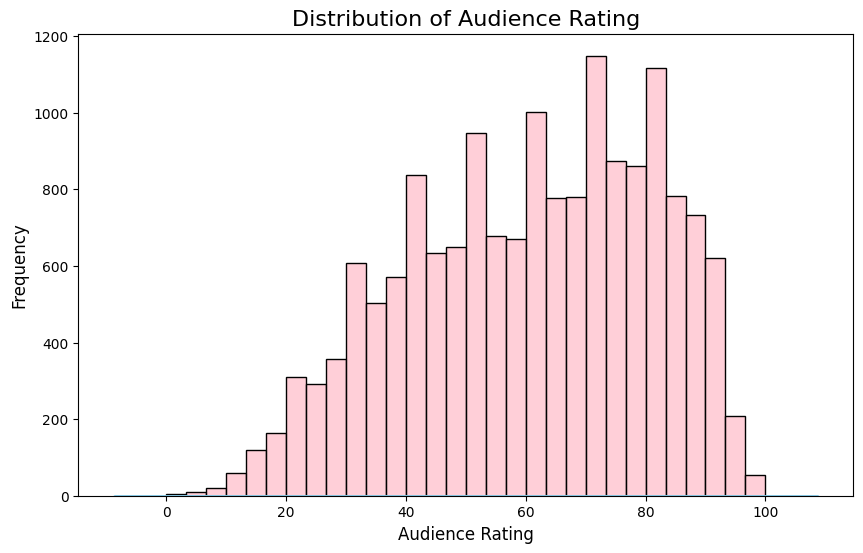

In [6]:
#Step 2:
# Check if the target variable exists
if 'audience_rating' in df.columns:
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the histogram with sky blue color
    sns.histplot(df['audience_rating'], bins=30, color='pink', ax=ax)

    # Overlay the KDE plot with yellow color fill inside the waveform
    sns.kdeplot(df['audience_rating'], color='skyblue', fill=True, ax=ax)

    # Set the title and labels
    plt.title('Distribution of Audience Rating', fontsize=16, color='black')
    plt.xlabel('Audience Rating', fontsize=12, color='black')
    plt.ylabel('Frequency', fontsize=12, color='black')

    # Show the plot
    plt.show()
else:
    raise ValueError("The target variable 'audience_rating' is not in the dataset.")

 Data Preprocessing

In [28]:
# Step 3: Data Preprocessing
# Handle missing values (e.g., drop or impute)
df = df.dropna()  # Drop rows with missing values

# Convert DateTime columns to numeric features (if any)
#datetime_cols = df.select_dtypes(include=['datetime64']).columns #Original line
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns #Updated line to specify nanosecond precision
for col in datetime_cols:
    df[col] = df[col].astype(np.int64)  # Convert to Unix timestamp (numeric format)

# Encode categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    # Check if the column contains mixed types and convert to string if necessary
    if df[col].apply(type).nunique() > 1:  # Check for multiple types
        df[col] = df[col].astype(str)  # Convert all values to strings

    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature-target split
X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Evaluation and Performance Comparison

In [8]:
# Step 4: Model Selection and Training
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


# Define the models to evaluate (replacing DecisionTreeRegressor with KNN)
models = {
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Evaluate models
print("\nModel Performance:")
for name, model in models.items():
    try:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results in the dictionary
        evaluation_results[name] = {
            'MAE': mae,
            'MSE': mse,
            'R2 Score': r2
        }

        # Print the performance of each model
        print(f"{name} Performance:")
        print(f" MAE: {mae:.4f}, MSE: {mse:.4f}, R2 Score: {r2:.4f}\n")

    except Exception as e:
        # Handle any errors that occur during fitting or prediction
        print(f"Error with model {name}: {e}")

# Optional: Show evaluation results in a DataFrame for better clarity
evaluation_df = pd.DataFrame(evaluation_results)
print("\nModel Evaluation Summary:")
print(evaluation_df)



Model Performance:
Support Vector Machine Performance:
 MAE: 15.5742, MSE: 360.6962, R2 Score: 0.0518

K-Nearest Neighbors Performance:
 MAE: 16.0967, MSE: 390.0383, R2 Score: -0.0253

Random Forest Performance:
 MAE: 9.7016, MSE: 151.8937, R2 Score: 0.6007


Model Evaluation Summary:
          Support Vector Machine  K-Nearest Neighbors  Random Forest
MAE                    15.574244            16.096715       9.701557
MSE                   360.696175           390.038265     151.893662
R2 Score                0.051815            -0.025319       0.600707


Hyperparameter Tuning for Random Forest

In [9]:
# Step 5: Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}



In [10]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)


print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}


In [11]:
# Final Model Evaluation
best_rf = grid_search.best_estimator_
y_pred_final = best_rf.predict(X_test)
print("\nFinal Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("MSE:", mean_squared_error(y_test, y_pred_final))
print("R2 Score:", r2_score(y_test, y_pred_final))



Final Model Performance:
MAE: 9.652784350309696
MSE: 148.868122561332
R2 Score: 0.6086606890032331



 Pipeline

In [17]:
# Step 6: Pipeline Creation

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(**grid_search.best_params_, random_state=42))
])

pipeline.fit(X_train, y_train)
final_predictions = pipeline.predict(X_test)
print("Pipeline R2 Score:", r2_score(y_test, final_predictions))

Pipeline R2 Score: 0.6088263694628949


Code for Preprocessing and Prediction

In [18]:
# Step 7: Predict 'audience_rating' for the existing data (same dataset)
# Preprocess the same dataset for prediction (using the same preprocessing steps as for training data)
df_preprocessed = df.copy()

In [19]:
# Step 7.1: Apply the same LabelEncoding for categorical features in the dataset
for col in categorical_cols:
    if col in df_preprocessed.columns:
        # Instead of directly transforming, handle unseen labels
        try:
            df_preprocessed[col] = label_encoders[col].transform(df_preprocessed[col])
        except ValueError as e:
            # Handle unseen labels (e.g., assign a default value or ignore)
            # Here, we'll replace unseen labels with a placeholder value like -1
            unseen_mask = ~df_preprocessed[col].isin(label_encoders[col].classes_)
            df_preprocessed.loc[unseen_mask, col] = -1
            print(f"Warning: Unseen labels in '{col}' replaced with -1.")


In [20]:
# Step 7.2: Drop any remaining rows with missing values (if any) from the dataset
df_preprocessed = df_preprocessed.dropna()


In [21]:
# Step 7.3: Ensure all features in df_preprocessed are numeric
# Check if any column is still object or string type after encoding, which should no longer be the case
print(df_preprocessed.dtypes)

movie_title             int64
movie_info              int64
critics_consensus       int64
rating                  int64
genre                   int64
directors               int64
writers                 int64
cast                    int64
in_theaters_date        int64
on_streaming_date       int64
runtime_in_minutes    float64
studio_name             int64
tomatometer_status      int64
tomatometer_rating      int64
tomatometer_count       int64
audience_rating       float64
dtype: object


In [22]:
# Step 7.4: Use the trained pipeline to predict 'audience_rating' for the preprocessed dataset
# Remove the target variable from the prediction data
X_preprocessed = df_preprocessed.drop(columns=['audience_rating'])
predictions = pipeline.predict(X_preprocessed)




In [23]:
# Step 7.5: Add predictions to the original dataframe as a new column
df['predicted_audience_rating'] = predictions



In [24]:

# Step 7.6: Display predictions for the 'audience_rating' column in the dataset
print("\nPredicted 'audience_rating' for the existing dataset:")
print(df[['audience_rating', 'predicted_audience_rating']].head())


Predicted 'audience_rating' for the existing dataset:
   audience_rating  predicted_audience_rating
0             53.0                  51.148033
1             64.0                  69.011763
3             97.0                  85.406824
4             74.0                  74.788594
5             37.0                  37.355096


Loading the Saved Pipeline for Predictions

In [25]:

# Step 8: Save the Pipeline for Future Use (Optional, if you want to save the trained pipeline)
import io
import joblib
pipeline_filename = 'audience_rating_pipeline.pkl'
joblib.dump(pipeline, pipeline_filename)
print(f"Pipeline saved as {pipeline_filename}")


Pipeline saved as audience_rating_pipeline.pkl


Accuracy

In [26]:
# Step 9: Validate Model Accuracy on Test Set (using the original data)
print("\nFinal Model Accuracy Validation (on the test set):")
print("R2 Score on Test Set:", r2_score(y_test, final_predictions))
print("MAE on Test Set:", mean_absolute_error(y_test, final_predictions))
print("MSE on Test Set:", mean_squared_error(y_test, final_predictions))


Final Model Accuracy Validation (on the test set):
R2 Score on Test Set: 0.6088263694628949
MAE on Test Set: 9.649790829518777
MSE on Test Set: 148.8050965931201
